# Assignment 2: Regression and classification

## Viktor Olsson (8 h) and Johan Wallgren (8 h)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns #seaborn is a package for nice-looking graphics
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#functions
#The following code has some code from the notebook knn_intro
def KNN_list(weight, range_list):
    accuracy = []
    for i in range_list:
        #Create KNN Classifier
        knn = KNeighborsClassifier(n_neighbors=i, weights=weight)

        #Train the model using the training sets
        knn.fit(x_train, y_train)

        #Predict the response for test dataset
        y_pred = knn.predict(x_test)

        # Model Accuracy, how often is the classifier correct?
        accuracy.append(metrics.accuracy_score(y_test, y_pred))
    return accuracy

#The following code has some code from the notebook logistic_regression_intro
def KNN_cm(k, weight, x_train, x_test, y_train, y_test):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k, weights=weight)

    #Train the model using the training sets
    knn.fit(x_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(x_test)

    # Use the score method to get the accuracy of model
    score = knn.score(x_test, y_test)
    
    #Create confusion matrix
    cm = confusion_matrix(y_test, y_pred, normalize = 'true')
    return cm

A lot of the code was found on https://scikit-learn.org/stable/

## 1.

The dataset used in the assignment was created by manually trancribing the values of living area and selling price, from https://www.hemnet.se/salda/bostader?location_ids%5B%5D=940808&item_types%5B%5D=villa&sold_age=6m, into an excel file. However, some houses did not state the living area and for that reason those houses were not included in the dataset.

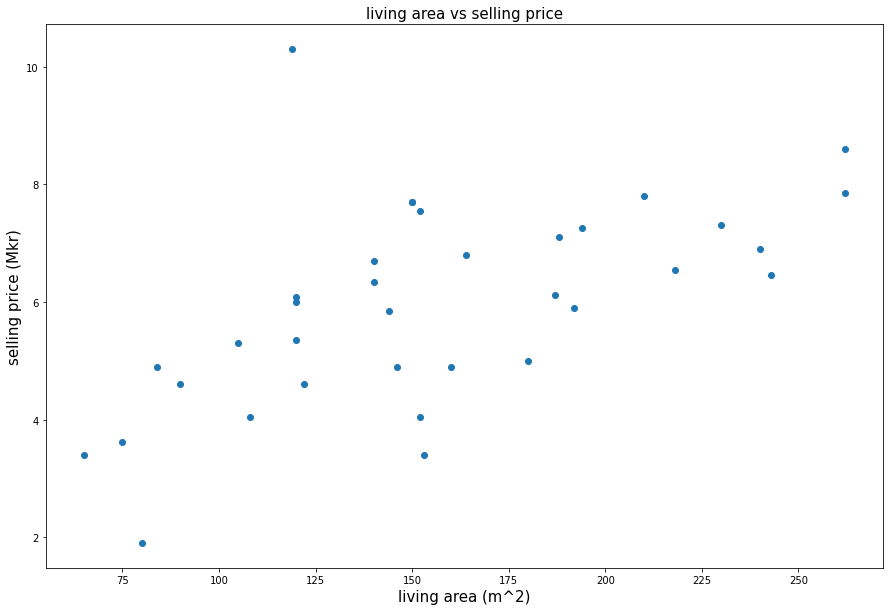

In [3]:
#read dataset and make a scatter plot.
villas = pd.read_csv('../../datasets/Villas.csv', sep=',')
plt.figure(figsize=(15, 10))
plt.scatter(villas['Area'],villas['Price'])
plt.title('living area vs selling price', fontsize = 15)
plt.xlabel('living area (m^2)', fontsize = 15)
plt.ylabel('selling price (Mkr)', fontsize = 15)
plt.show()

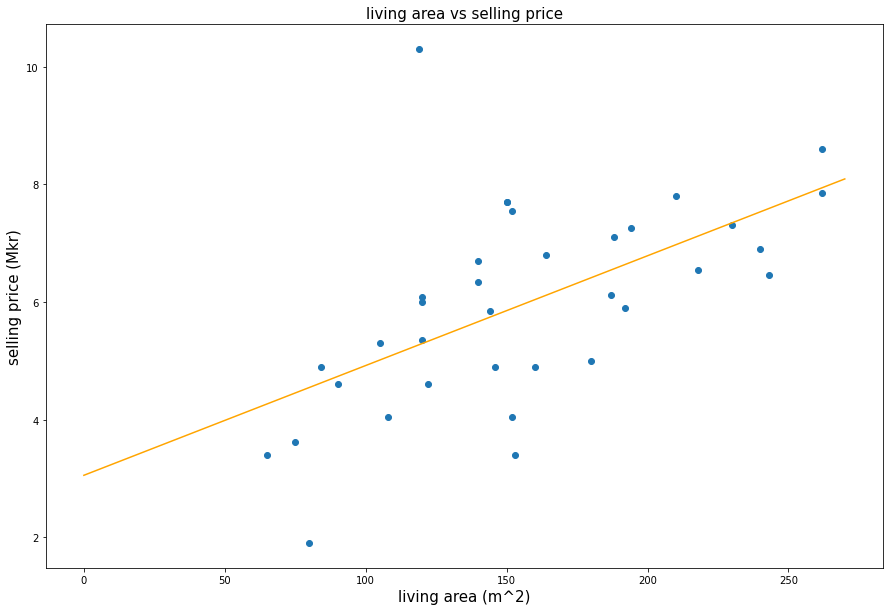

In [4]:
#The following code has some code from the notebook linear_regression_intro
#Create linear regression and plot with scatter plot
x = np.array(villas['Area']).reshape(-1,1)
y = np.array(villas['Price'])
lin_reg = LinearRegression().fit(x,y)

xfit = np.linspace(0, 270, 1000) #1000 evenly spaced points in [0, 11].
yfit = lin_reg.predict(xfit[:, np.newaxis])

plt.figure(figsize=(15, 10))
plt.scatter(x, y)
plt.plot(xfit, yfit, color='orange')
plt.title('living area vs selling price', fontsize = 15)
plt.xlabel('living area (m^2)', fontsize = 15)
plt.ylabel('selling price (Mkr)', fontsize = 15)
plt.show()

### i.

The slope (k) is equal to 0.018

In [5]:
lin_reg.coef_

array([0.01865723])

And the intercept (m) is equals to 3.05

In [6]:
lin_reg.intercept_

3.05243521654146

### ii.

The predicted selling prices for a house with the living area of 100 m^2 is 4.92 Mkr.

In [7]:
lin_reg.predict([[100]])

array([4.91815832])

For 150 m^2 the predicted value is 5.85 Mkr. 

In [8]:
lin_reg.predict([[150]])

array([5.85101987])

And for 200 m^2 the predicted values is 6.78 Mkr.

In [9]:
lin_reg.predict([[200]])

array([6.78388142])

### iii.

Below is the residual plot drawn.

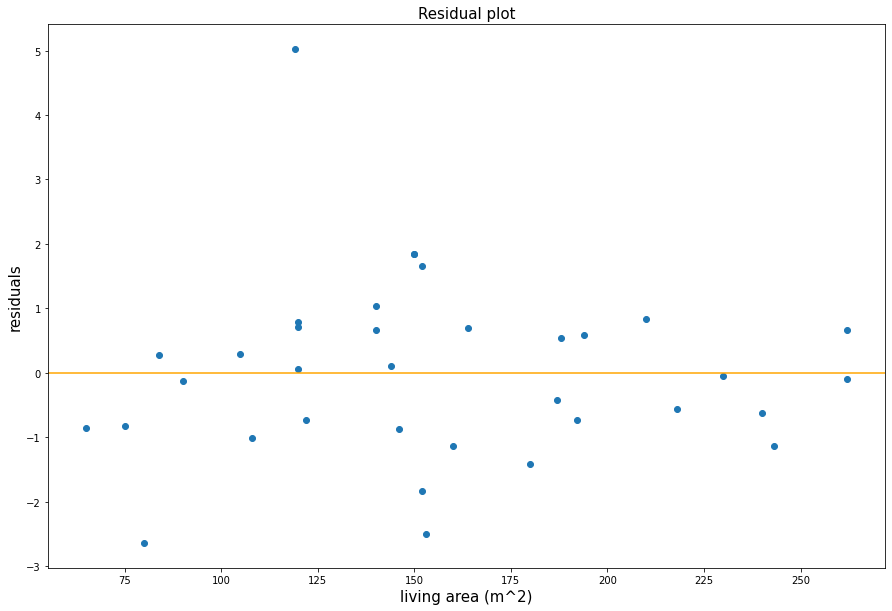

In [10]:
pred = []
for x in villas['Area']:
    x_pred = lin_reg.predict([[x]])
    pred.append(x_pred)
pred = pd.DataFrame(pred, columns=['y-Pred'])
pred_1 = pd.concat([villas,pred],axis=1,join='inner')

res = []
for index,row in pred_1.iterrows():
    residual = row['Price'].astype(float) - row['y-Pred'].astype(float)
    res.append(residual)
res = pd.DataFrame(res, columns=['Residual'])
pred_2 = pd.concat([pred_1,res],axis=1,join='inner')

x = pred_2['Area']
y = pred_2['Residual']

plt.figure(figsize=(15, 10))
plt.scatter(x, y)
plt.axhline(y=0, color='orange')
plt.title('Residual plot', fontsize = 15)
plt.xlabel('living area (m^2)', fontsize = 15)
plt.ylabel('residuals', fontsize = 15)
plt.show()

### iv.

The residual plot is balanced but with high variance residuals. This shows that linear regression is possible but that the result may not be entirely true.

For a better result, these high variance residuals would need to be filtered out. Other improvments to be done could be to add more datapoints for more accurate predictions, look for a better solution by comparing the linear regression with other models and/or looking at other aspects then living area and selling price (such as total area).

## 2.

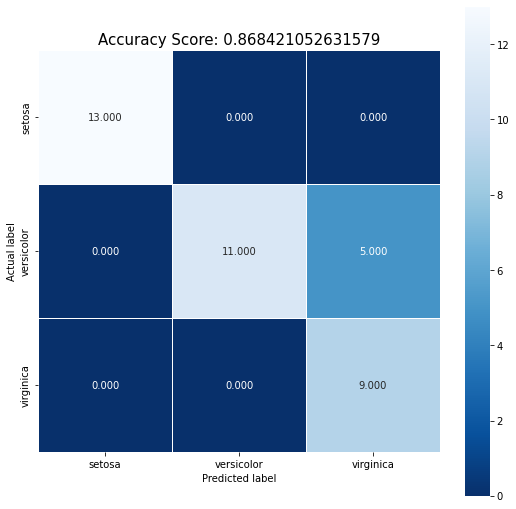

In [11]:
#The following code has some code from the notebook logistic_regression_intro
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)
logisticRegr = LogisticRegression(multi_class='ovr', solver='liblinear') #multi_class='ovr', one-vs-rest
logisticRegr.fit(x_train, y_train)

# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test[0:10])

# Make predictions on entire test data
predictions = logisticRegr.predict(x_test)

# Use the score method to get the accuracy of model
score = logisticRegr.score(x_test, y_test)

cm = metrics.confusion_matrix(y_test, predictions)

fig, axs = plt.subplots(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
axs.set_xticklabels(iris.target_names)
axs.set_yticklabels(iris.target_names)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show();

According to the confusion matrix, logistical regression is a decent choice for the iris dataset. The model only fails at one clasification and that is when it misclassifies 5 versicolor flowers as virginica.

## 3.

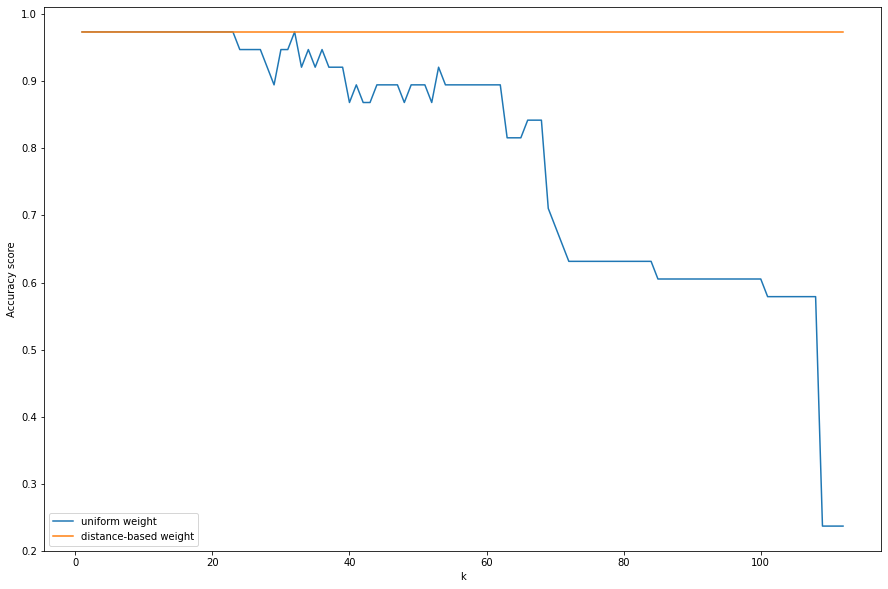

In [12]:
range_list = list(range(1,113))
plt.figure(figsize=(15, 10))
plt.plot(range_list,KNN_list('uniform',range_list), label='uniform weight') 
plt.plot(range_list,KNN_list('distance',range_list), label='distance-based weight')
plt.xlabel('k');
plt.ylabel('Accuracy score');
plt.legend()
plt.show()

When using distance-based weight, the accuracy stays high for all values of k. This is because even though it takes all the data points into consideration, the data point that are far away will have a low impact compared to the data point that are near.

When using uniform weights, however, the distance from the data points does not influence the impact. This means that for too high values of k the model might be underfitted, which is why we see the big drop in accuracy for k values above 60. But for low values of k the model will be overfitted, so the optimal choice of k would be the highest value possible that still has high accuracy.

## 4.

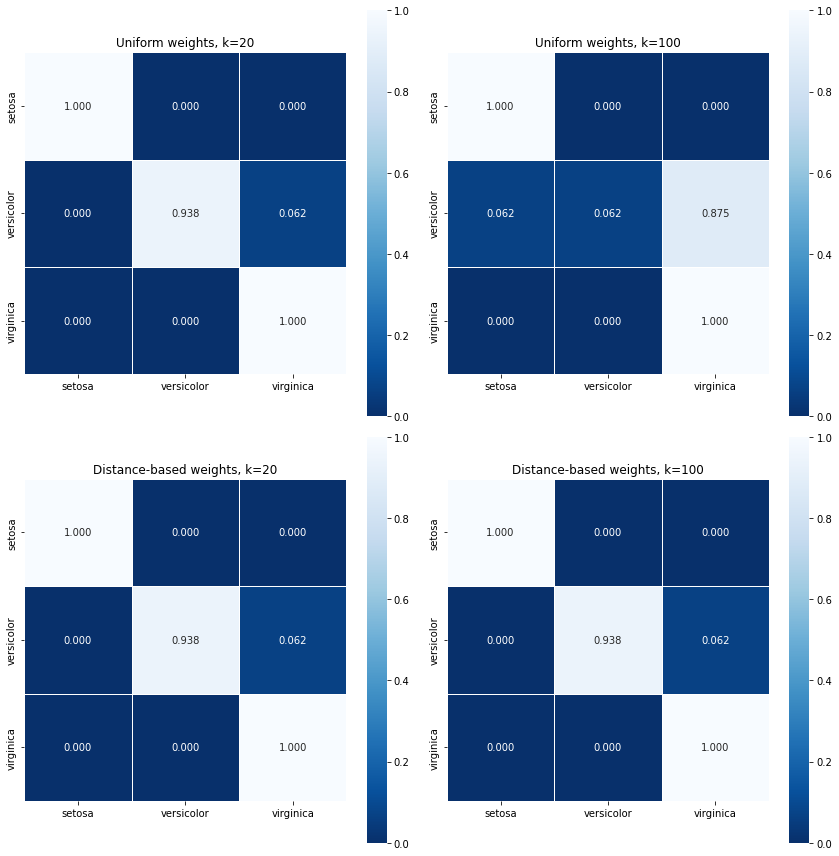

In [13]:
#subplots from https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
k1=20
k2=100
fig, axs = plt.subplots(2, 2,figsize=(12,12))
sns.heatmap(KNN_cm(k1, 'uniform', x_train, x_test, y_train, y_test), ax = axs[0, 0]
            , annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
sns.heatmap(KNN_cm(k1, 'distance', x_train, x_test, y_train, y_test), ax = axs[1, 0]
            , annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
sns.heatmap(KNN_cm(k2, 'uniform', x_train, x_test, y_train, y_test), ax = axs[0, 1]
            , annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
sns.heatmap(KNN_cm(k2, 'distance', x_train, x_test, y_train, y_test), ax = axs[1, 1]
            , annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
axs[0, 0].set_title("Uniform weights, k={}".format(k1))
axs[0, 0].set_xticklabels(iris.target_names)
axs[0, 0].set_yticklabels(iris.target_names)
axs[1, 0].set_title("Distance-based weights, k={}".format(k1))
axs[1, 0].set_xticklabels(iris.target_names)
axs[1, 0].set_yticklabels(iris.target_names)
axs[0, 1].set_title("Uniform weights, k={}".format(k2))
axs[0, 1].set_xticklabels(iris.target_names)
axs[0, 1].set_yticklabels(iris.target_names)
axs[1, 1].set_title("Distance-based weights, k={}".format(k2))
axs[1, 1].set_xticklabels(iris.target_names)
axs[1, 1].set_yticklabels(iris.target_names)
fig.tight_layout()

Here the same result as in question 3 is visulized. For distance-based weights the accuracy remains the same for all values of k. But for uniform weights the model is underfitted for high values of k, i.e. the model looses accuracy.

But from the confusion matrices, compared to the graph in question 3, it can be seen that the lost accuracy is only due to misinterpritation of versicolor. Setosa and virginica are predicted correctly for both models up to a k value of 108, above that the uniform model only predicts virginica. The reason for that is probably because there are more data points on virginica than on setosa and versicolor, so when almost all data point are taken into consideration, virginica has a majority.

## 5.

When designing a model for machine learning it is important to divide the data into different parts. These parts are usually a training set and a test set, splitted as 75%/25% of the data set. The training set is used to derive a model and for the machine to learn from. The test set is then used to evaluate if the model works as intended. Running a model on a test set gives an objective performance measure of the model and is important to do as a verification that the model isn't modeled for the training set only.